[0.22991445660898213, 0.5939207709488736, 1.8434047454713387]
forward kin: [-10.0, 59.99999999999998, -200.0]
endEffector position: (-10.0, 59.999967080000005, -199.99999987)


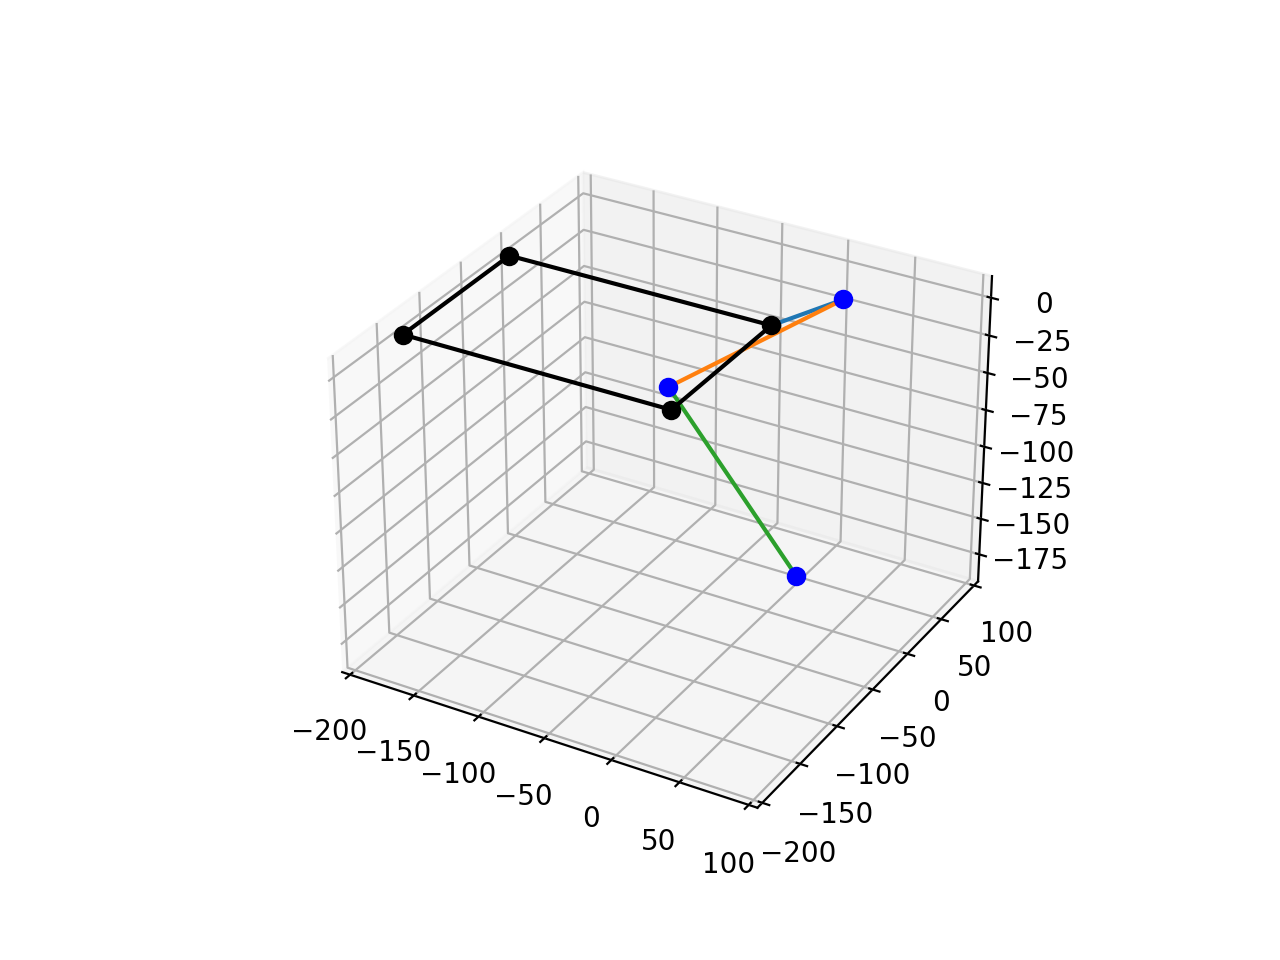

In [27]:
%matplotlib widget
import math
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

L1 = 104
L2 = 150
L3 = 150
J3_min = 30*np.pi/180
J3_max = 170*np.pi/180

class Point:
    def __init__(self):
        self.x:float
        self.y:float
        self.z:float


def plotLeg(angs:np.ndarray):
    l1_x = 0
    l2_x = -float(f"{L2*np.cos(angs[1]):.8f}") + l1_x
    l3_x = -float(f"{L3*np.cos(angs[1] + angs[2]):.8f}") + l2_x
    # ---
    l1_y =  float(f"{L1*np.cos(angs[0]):.4f}")
    l2_y = -float(f"{L2*np.sin(angs[1])*np.sin(angs[0]):.8f}") + l1_y
    l3_y = -float(f"{L3*np.sin(angs[1] + angs[2])*np.sin(angs[0]):.8f}") + l2_y
    # ---
    l1_z = -float(f"{L1*np.sin(angs[0]):.4f}")
    l2_z = -float(f"{L2*np.sin(angs[1])*np.cos(angs[0]):.8f}") + l1_z
    l3_z = -float(f"{L3*np.sin(angs[1] + angs[2])*np.cos(angs[0]):.8f}") + l2_z

    # x = -L2*np.cos(angs[1]) - L3*np.cos(angs[1] + angs[2])
    # y = L1*np.cos(angs[0]) - L2*np.sin(angs[1])*np.sin(angs[0]) - L3*np.sin(angs[1] + angs[2])*np.sin(angs[0])
    # z = -L1*np.sin(angs[0]) - L2*np.sin(angs[1])*np.cos(angs[0]) - L3*np.sin(angs[1] + angs[2])*np.cos(angs[0])

    print(f"endEffector position: {l3_x, l3_y, l3_z}")
    # ---
    body_len_x = 200
    body_len_y = 130


    fig = plt.figure(dpi=200)
    ax = plt.axes(projection="3d")
    # leg FL
    ax.plot3D([0, l1_x], [0, l1_y], [0, l1_z])
    ax.plot3D([l1_x, l2_x], [l1_y, l2_y], [l1_z, l2_z])
    ax.plot3D([l2_x, l3_x], [l2_y, l3_y], [l2_z, l3_z])
    ax.plot(0,0,0, 'ko')
    ax.plot(l1_x,l1_y, l1_z, 'bo')
    ax.plot(l2_x,l2_y, l2_z, 'bo')
    ax.plot(l3_x,l3_y, l3_z, 'bo')
    # body
    ax.plot3D([0, -body_len_x], [0, 0], [0, 0], '-k')
    ax.plot(-body_len_x,0,0, 'ko')
    ax.plot3D([0, 0], [0, -body_len_y], [0, 0], '-k')
    ax.plot(0,-body_len_y,0, 'ko')
    ax.plot3D([-body_len_x, 0], [-body_len_y, -body_len_y], [0, 0], '-k')
    ax.plot(-body_len_x,-body_len_y,0, 'ko')
    ax.plot3D([-body_len_x, -body_len_x], [0, -body_len_y], [0, 0], '-k')
    # ---
    ax.set_xlim(-200, 100)
    ax.set_ylim(-200, 100)
    ax.set_zlim(-190, 10)

def fk_EF(angs:np.ndarray):
    x = -L2*np.cos(angs[1]) \
        -L3*np.cos(angs[1]+angs[2])

    y =  L1*np.cos(angs[0]) \
        -L2*np.sin(angs[1])*np.sin(angs[0]) \
        -L3*np.sin(angs[1]+angs[2])*np.sin(angs[0])

    z = -L1*np.sin(angs[0]) \
        -L2*np.sin(angs[1])*np.cos(angs[0]) \
        -L3*np.sin(angs[1]+angs[2])*np.cos(angs[0])
    return [x, y, z]


def ik(p:np.ndarray):
    r_yz = np.sqrt(p.y**2 + p.z**2)
    sin_th1_plus_alpha = L1/r_yz
    cos_th1_plus_alpha = np.sqrt(r_yz**2 - L1**2) / r_yz
    th1 = np.arctan2(sin_th1_plus_alpha, cos_th1_plus_alpha) - np.arctan2(p.y, -p.z)
    # cos_alpha_minus_th1 = L1/(np.sqrt(p.y**2 + p.z**2))
    # sin_alpha_minus_th1 = np.sqrt(1 - cos_alpha_minus_th1**2)
    # alpha = np.arctan2(-p.z, p.y)
    # th1 = alpha - np.arctan2(sin_alpha_minus_th1, cos_alpha_minus_th1)
    # ------------------------
    cos_th3 = (p.x**2 + p.y**2 + p.z**2 - L1**2 -L2**2 - L3**2)/(2*L2*L3)
    sin_th3 = np.sqrt(1 - cos_th3**2)
    th3 = np.arctan2(sin_th3, cos_th3)  # leg config 1
    # th3 = np.arctan2(-sin_th3, cos_th3)  # Leg config 2
    # ------------------------
    a = L3*np.sin(th3)
    b = L2 + L3*np.cos(th3)
    c = np.sqrt(a**2 + b**2)
    beta = np.arctan2(b, a)
    sin_th2_minus_beta = x/c
    cos_th2_minus_beta = np.sqrt( 1 - (x/c)**2)
    th2_minus_beta = np.arctan2(sin_th2_minus_beta, cos_th2_minus_beta)
    th2 = th2_minus_beta + beta
    return [th1, th2, th3]


x = -10
y = 60
z = -200

p = Point()
p.x = x
p.y = y
p.z = z

angs = ik(p)
# angs[1] = angs[1] - 130*np.pi/180
# angs = np.array([40,90,90])*np.pi/180
print(angs)
print(f"forward kin: {fk_EF(angs)}")

# angs = np.array([th0, th1, th1-th2])*np.pi/180
plotLeg(angs)



In [19]:
2.12**2

4.494400000000001

In [ ]:
y = 
np.arctan2(y, x)